In [2]:
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
import re

base_path = "results"
rows = []

for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)

    if os.path.isdir(folder_path) and folder.endswith("_servers"):
        for file in os.listdir(folder_path):
            if file.endswith(".json"):
                file_path = os.path.join(folder_path, file)
                matrix_size = re.search(r"\d+", file).group()

                with open(file_path, "r", encoding="utf-8") as f:
                    data = json.load(f)

                rows.append(
                    {
                        "matrix_size": int(matrix_size),
                        "available_servers": data["available_servers"],
                        # "initial_time": data["initial_time"],
                        # "final_time": data["final_time"],
                        "duration_time": data["duration_time"],
                    }
                )

df = pd.DataFrame(rows)
df = df.sort_values(["available_servers", "matrix_size"]).reset_index(drop=True)
df.to_clipboard()

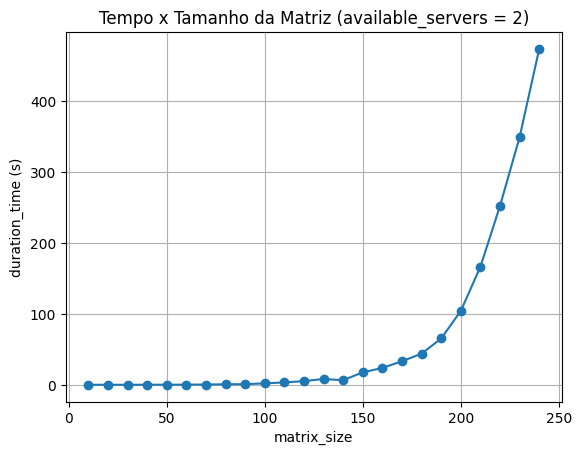

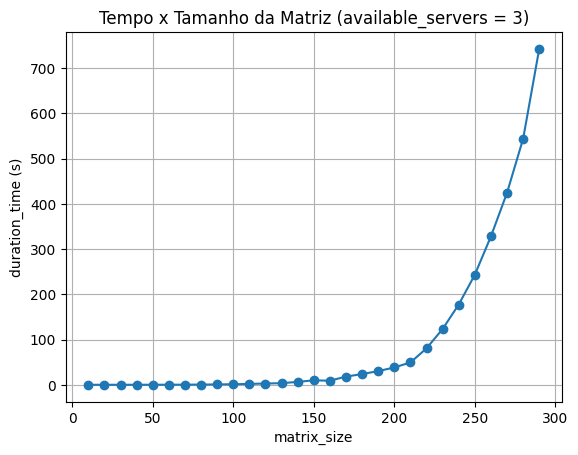

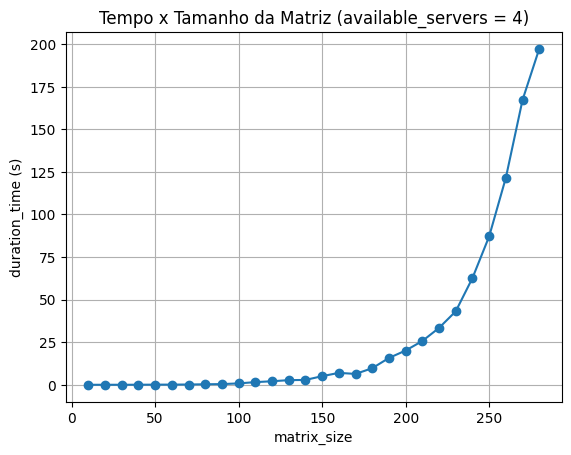

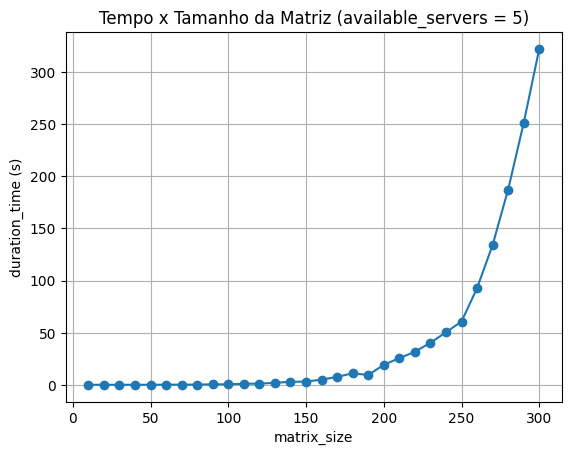

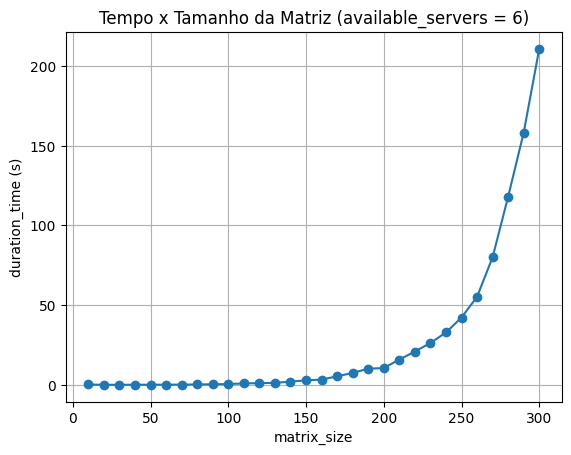

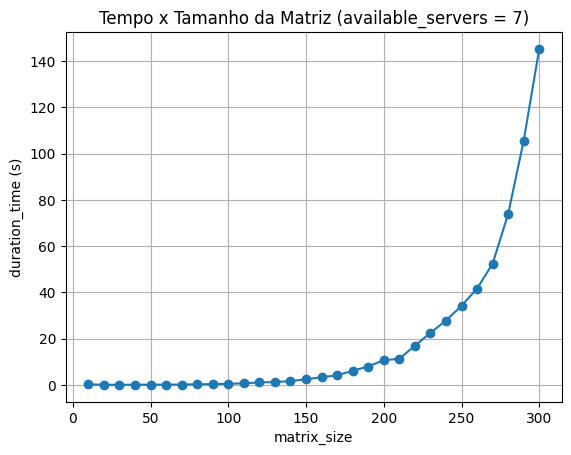

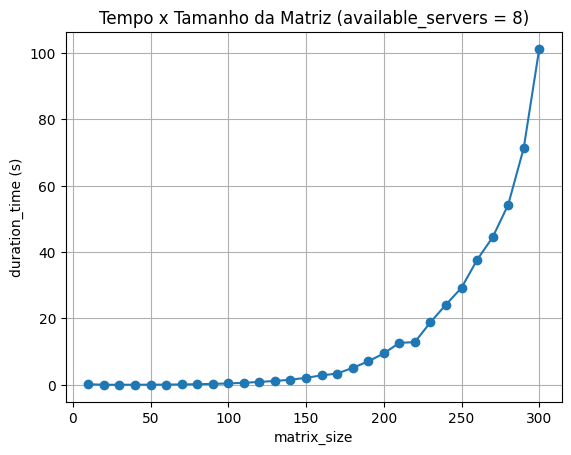

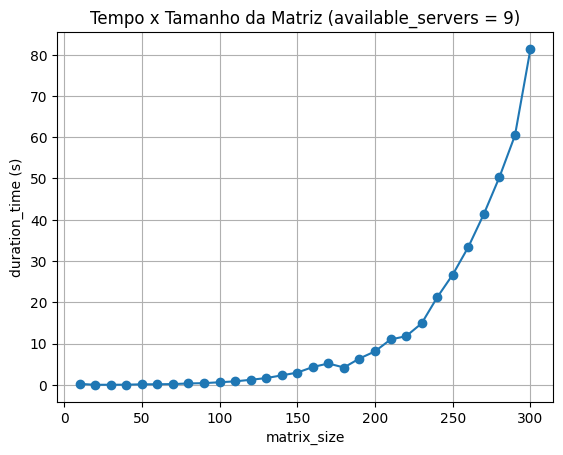

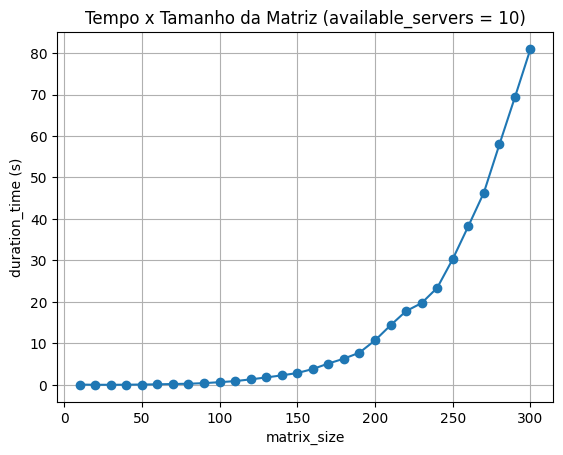

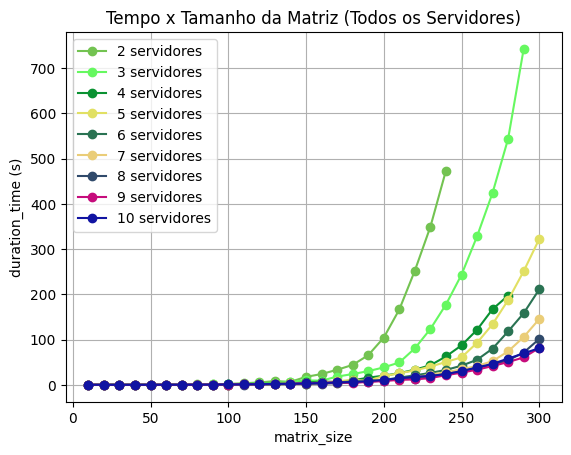

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import random

def plot_por_servidor(df):
    # Garantir que duration_time esteja em segundos
    if pd.api.types.is_timedelta64_dtype(df["duration_time"]):
        df = df.copy()
        df["duration_time"] = df["duration_time"].dt.total_seconds()

    servidores = sorted(df["available_servers"].unique())

    # ---- Gráficos individuais ----
    for s in servidores:
        subset = df[df["available_servers"] == s].sort_values("matrix_size")

        plt.figure()
        plt.plot(subset["matrix_size"], subset["duration_time"], marker="o")
        plt.title(f"Tempo x Tamanho da Matriz (available_servers = {s})")
        plt.xlabel("matrix_size")
        plt.ylabel("duration_time (s)")
        plt.grid(True)
        plt.show()

    # ---- Gráfico combinado (N+1) ----
    plt.figure()

    for s in servidores:
        subset = df[df["available_servers"] == s].sort_values("matrix_size")

        # gera cor aleatória
        color = (random.random(), random.random(), random.random())

        plt.plot(
            subset["matrix_size"],
            subset["duration_time"],
            marker="o",
            color=color,
            label=f"{s} servidores"
        )

    plt.title("Tempo x Tamanho da Matriz (Todos os Servidores)")
    plt.xlabel("matrix_size")
    plt.ylabel("duration_time (s)")
    plt.grid(True)
    plt.legend()
    plt.show()

plot_por_servidor(df)